In [69]:
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

DATASET = "Adult"
MODEL = "RISAN"
FAIRNESS_CONDITION = "abs_neg_pos"
COST = 0.2
RUN_NUM = 0

if not os.path.exists(f"results/{DATASET}/{MODEL}/{FAIRNESS_CONDITION}/{COST:f}"):
    print("Results don't exist")
    exit()

In [70]:
with open(f"results/{DATASET}/{MODEL}/{FAIRNESS_CONDITION}/{COST:f}/run_{RUN_NUM}_train_metric-epochs.json", "r") as f:
    train_results = json.load(f)
with open(f"results/{DATASET}/{MODEL}/{FAIRNESS_CONDITION}/{COST:f}/run_{RUN_NUM}_val_metric-epochs.json", "r") as f:
    val_results = json.load(f)


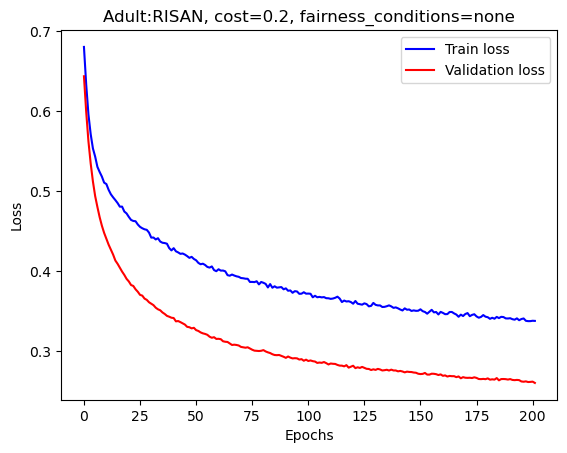

In [71]:
# Loss vs epoch curves
train_losses = [result["loss"] for result in train_results]
val_losses = [result["loss"] for result in val_results]

plt.title(f"{DATASET}:{MODEL}, cost={COST}, fairness_conditions={FAIRNESS_CONDITION}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.arange(len(train_losses)), train_losses, color="blue", label="Train loss")
plt.plot(np.arange(len(val_losses)), val_losses, color="red", label="Validation loss")
plt.legend()
plt.show()

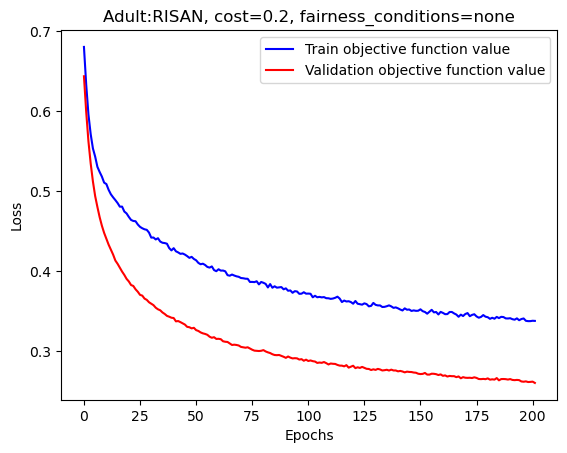

In [72]:
# Objective function vs epoch curves
train_obj = [result["obj"] for result in train_results]
val_obj = [result["obj"] for result in val_results]

plt.title(f"{DATASET}:{MODEL}, cost={COST}, fairness_conditions={FAIRNESS_CONDITION}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.arange(len(train_obj)), train_obj, color="blue", label="Train objective function value")
plt.plot(np.arange(len(val_obj)), val_obj, color="red", label="Validation objective function value")
plt.legend()
plt.show()

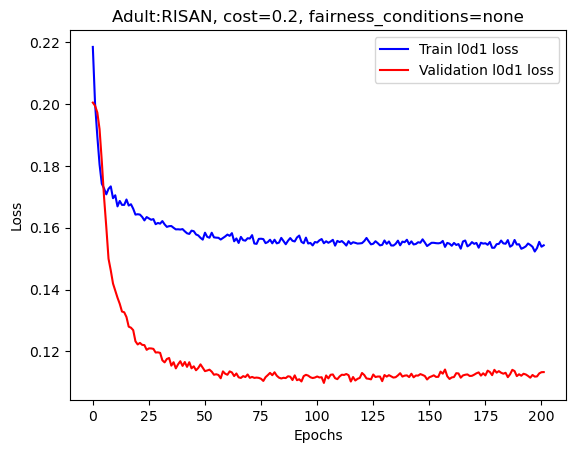

In [73]:
# L0d1 vs epoch curves
train_l0d1 = [result["l0d1"] for result in train_results]
val_l0d1 = [result["l0d1"] for result in val_results]

plt.title(f"{DATASET}:{MODEL}, cost={COST}, fairness_conditions={FAIRNESS_CONDITION}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.arange(len(train_l0d1)), train_l0d1, color="blue", label="Train l0d1 loss")
plt.plot(np.arange(len(val_l0d1)), val_l0d1, color="red", label="Validation l0d1 loss")
plt.legend()
plt.show()

In [74]:
# Lambda vs delta lambda (if present)
if "lambdas" in train_results[0]:
    for lam in train_results[0]["lambdas"]:
        plt.title(
            f"{DATASET}:{MODEL}, cost={COST}, fairness_conditions={lam}"
        )
        lambdas = [result["lambdas"][lam] for result in train_results]
        train_deltas = np.abs(
            np.array([result[f"{lam}_0"] for result in train_results])
            - np.array([result[f"{lam}_1"] for result in train_results])
        )
        val_deltas = np.abs(
            np.array([result[f"{lam}_0"] for result in val_results])
            - np.array([result[f"{lam}_1"] for result in val_results])
        )
        plt.xlabel("Epochs")
        plt.ylabel("Lagrange value")
        plt.plot(np.arange(len(lambdas)), lambdas, color="green", label="Lagrange multiplier")
        plt.legend()
        plt.show()
        plt.xlabel("Epochs")
        plt.plot(np.arange(train_deltas.shape[0]), train_deltas, color="blue", label=f"Train dataset: absolute delta of {lam}")
        plt.plot(np.arange(val_deltas.shape[0]), val_deltas, color="red", label=f"Val dataset: absolute delta of {lam}")
        plt.legend()
        plt.show()
